In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
chiefs_csvs = os.listdir('../CSVs/Chiefs_CSVs')
chiefs_dfs = [pd.read_csv('../CSVs/Chiefs_CSVs/'+csv) for csv in chiefs_csvs]

for df in chiefs_dfs:
    df['Date'] = pd.to_datetime(df['Date'])
    
mega_Chiefs_df = pd.concat(chiefs_dfs)

In [3]:
chiefs_dfs[0].head() # 0 = Bears #

Unnamed: 0                   ID                      Date             User  \
0           0  1595203228131643392 2022-11-22 23:51:01+00:00      ChiefsViews   
1           1  1595202986296619008 2022-11-22 23:50:04+00:00      ChiefsViews   
2           2  1595202985390317568 2022-11-22 23:50:03+00:00   KC_sports_fans   
3           3  1595201948256444424 2022-11-22 23:45:56+00:00  deshaunturner95   
4           5  1595200753798299648 2022-11-22 23:41:11+00:00     TeamNBSMedia   

                                               Tweet  \
0  Chiefs &amp; Chargers Fans Brawl During Intens...   
1  Brittany Mahomes Has Never Looked More Glowing...   
2  Dave Toub: “We are improving each day and each...   
3  Thank you for representing us chiefs fans. Wit...   
4  Kansas City Chiefs - Weapons Galore - Team NBS...   

                                            HashTags  Likes  Retweets  \
0  ['KansasCityChiefs', 'Chiefs', 'KCChiefs', 'Go...      0         0   
1  ['KansasCityChiefs', 'Chiefs', 'KCChiefs', 'Go...      0         0   
2                    ['KansasCity', 'Chiefs', 'NFL']      0         0   
3                                  ['ChiefsKingdom']     10         4   
4                    ['ChiefsKingdom', 'NFL', 'NFL']      9         9   

                                        MentionUsers  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [User(username='GregCowboys', id=8530017745667...   

                                 LocationCoordinates  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Coordinates(longitude=-80.330201, latitude=26....   
4                                                NaN   

                                         clean_Tweet  NLTK_Sentiment_Analysis  \
0     chiefs amp chargers fans brawl intense matchup                   0.0772   
1  brittany mahomes never looked glowing rare amp...                   0.4215   
2  dave toub improving day game press conference ...                   0.4215   
3  thank representing us chiefs fans best qb leag...                   0.9652   
4  kansas city chiefs weapons galore team nbs med...                  -0.5859   

   TextBlob_Sentiment_Analysis  Compound_Sentiment_Score  Positive_Sentiment  
0                     0.200000                  0.277200                True  
1                     0.233333                  0.654833                True  
2                    -0.400000                  0.021500                True  
3                     1.000000                  1.965200                True  
4                     0.000000                 -0.585900               False

In [4]:
b_game_1 = chiefs_dfs[0]

In [5]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
ChiefsViews     261
CjGeiss          58
GaryRoth79       54
goldmctNFL       47
BrettRasdall     41
dtype: int64


User
TheChiefsWire     41
aaronladd0        30
jahwkfan          29
PJGreenTV         22
ArrowheadPride    20
dtype: int64

In [6]:
chiefs_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'NLTK_Sentiment_Analysis', 'TextBlob_Sentiment_Analysis',
       'Compound_Sentiment_Score', 'Positive_Sentiment'],
      dtype='object')

In [7]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

In [8]:
chiefs_csvs

['Chiefs_Game10_Chargers.csv',
 'Chiefs_Game11_Rams.csv',
 'Chiefs_Game1_Cardinals.csv',
 'Chiefs_Game2_Chargers.csv',
 'Chiefs_Game3_Colts.csv',
 'Chiefs_Game4_Bucs.csv',
 'Chiefs_Game5_Raiders.csv',
 'Chiefs_Game6_Bills.csv',
 'Chiefs_Game7_Niners.csv',
 'Chiefs_Game8_Titans.csv',
 'Chiefs_Game9_Jags.csv',
 'Chiefs_Pre_Game1_Bears.csv',
 'Chiefs_Pre_Game2_Commanders.csv',
 'Chiefs_Pre_Game3_Packers.csv']

In [9]:
# users = chiefs_dfs[0].groupby(['User']).size().sort_values(ascending=False).head(5)
# l = list(users.index.values) 
# make_scatter_and_pie_figure(remove_users_from_df(chiefs_dfs[0], l), 'chiefs  Bears - Removed Users')

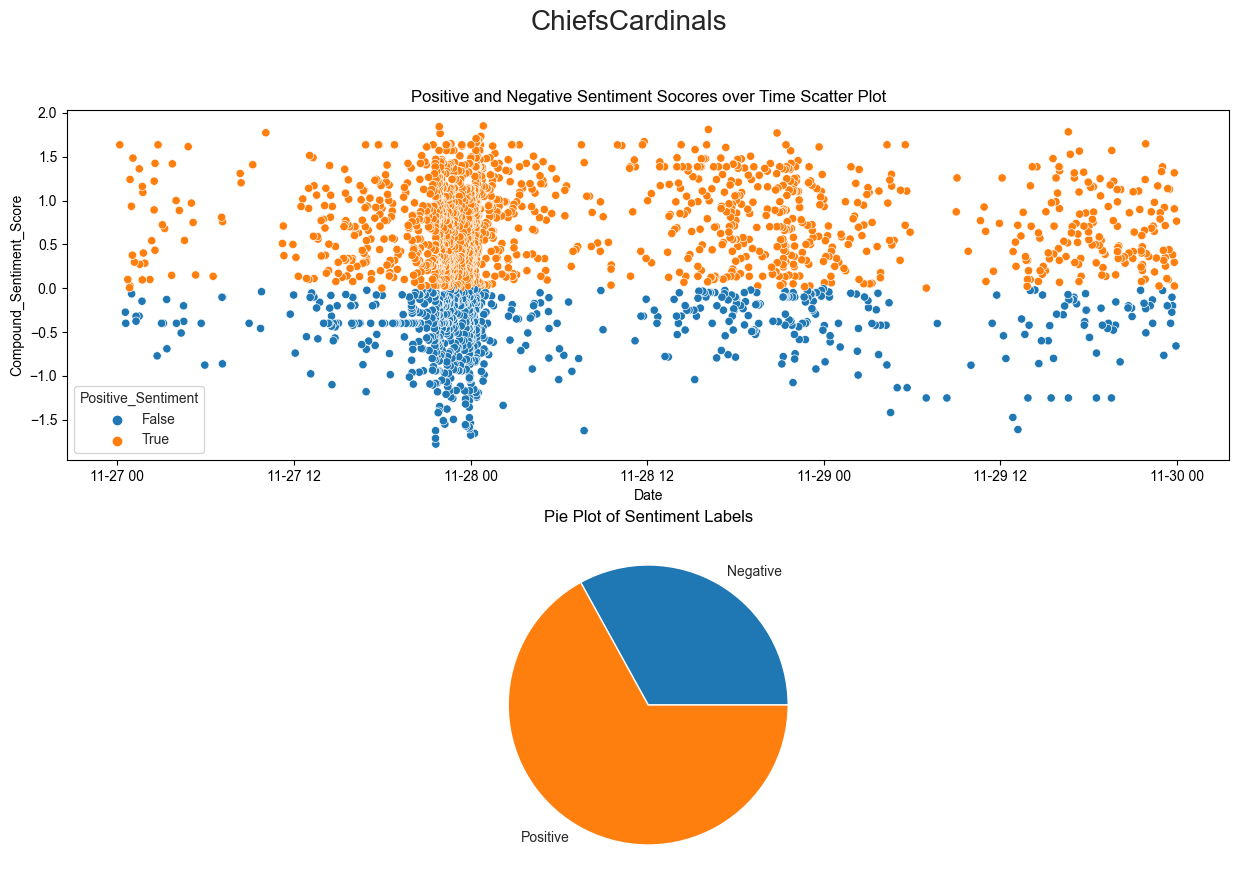

In [10]:
make_scatter_and_pie_figure(chiefs_dfs[1], 'ChiefsCardinals', save = True)

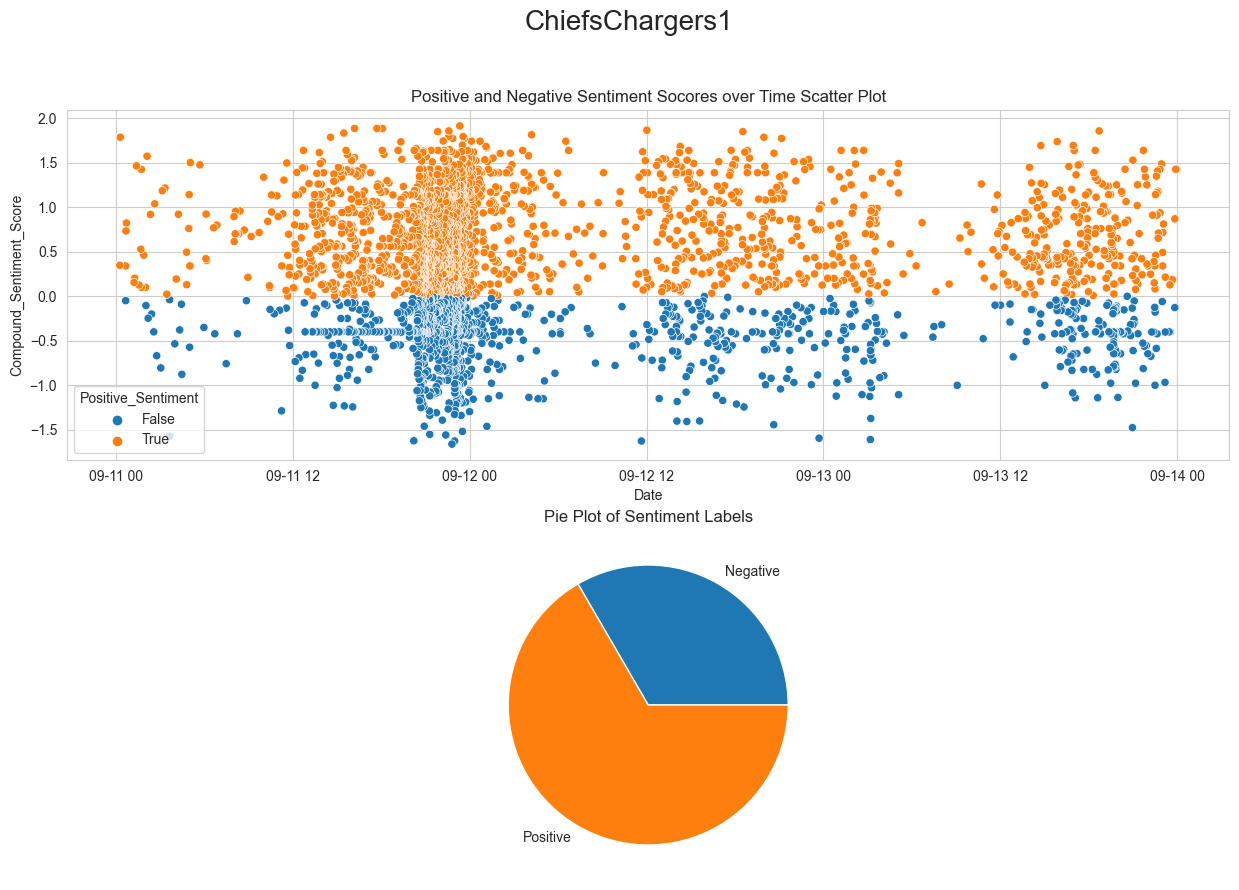

In [11]:
make_scatter_and_pie_figure(chiefs_dfs[2], 'ChiefsChargers1', save = True)

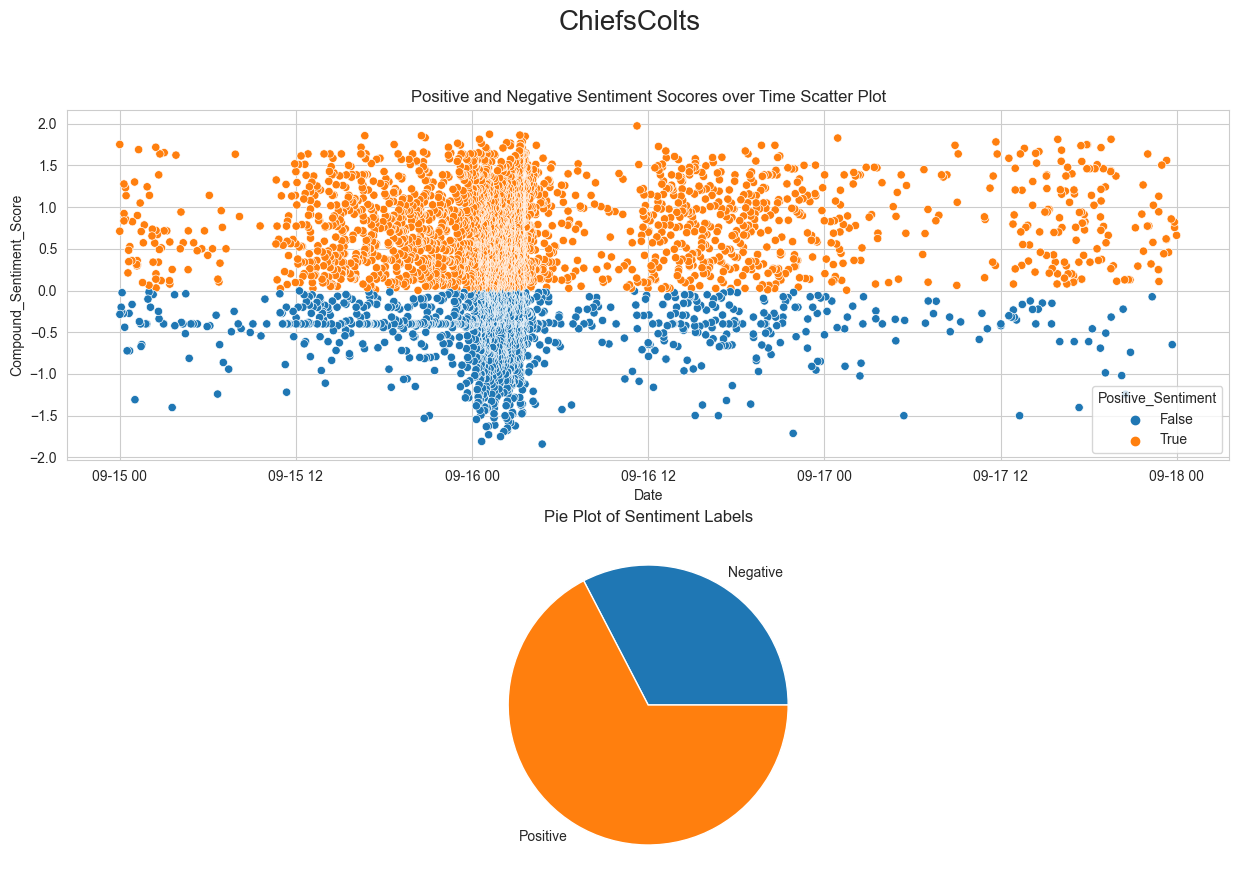

In [12]:
make_scatter_and_pie_figure(chiefs_dfs[3], 'ChiefsColts', save = True)

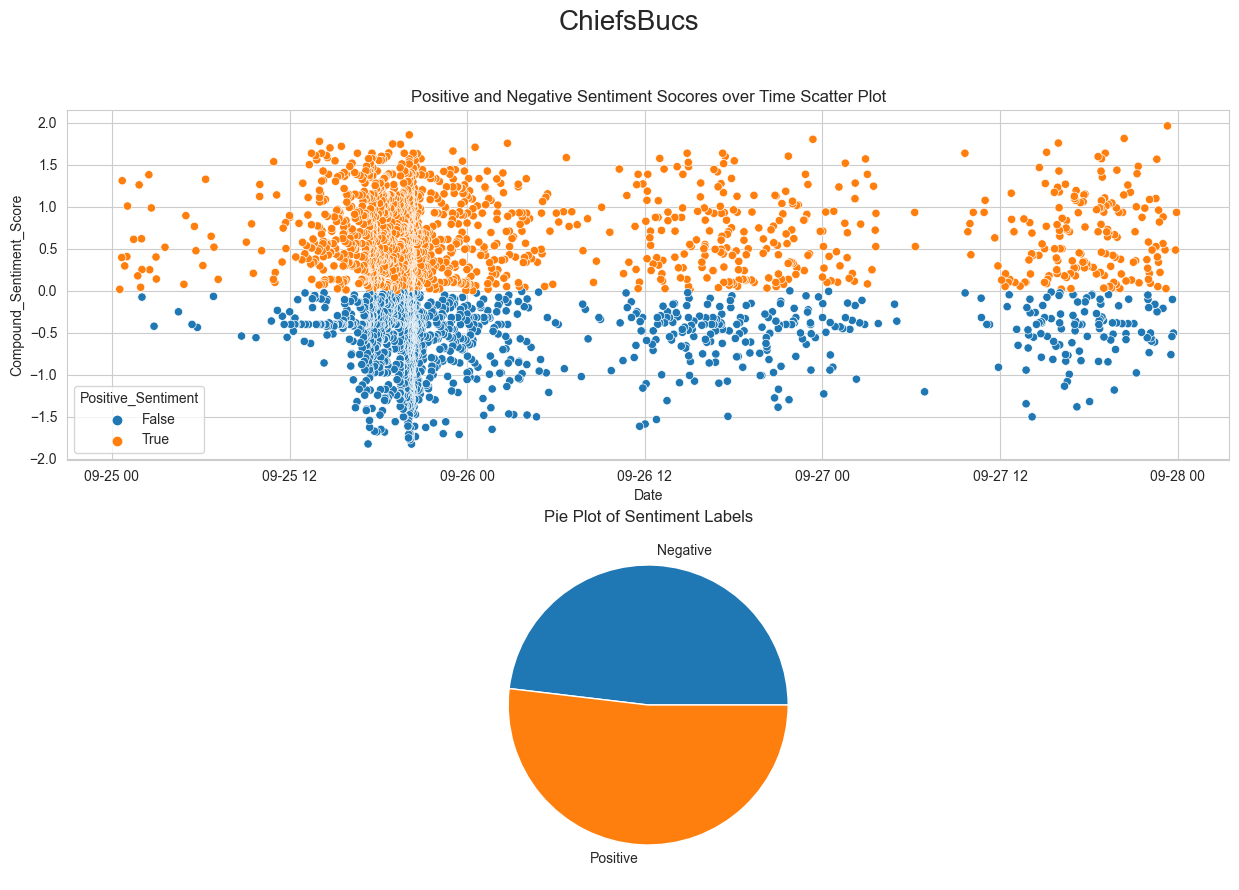

In [13]:
make_scatter_and_pie_figure(chiefs_dfs[4], 'ChiefsBucs', save = True)

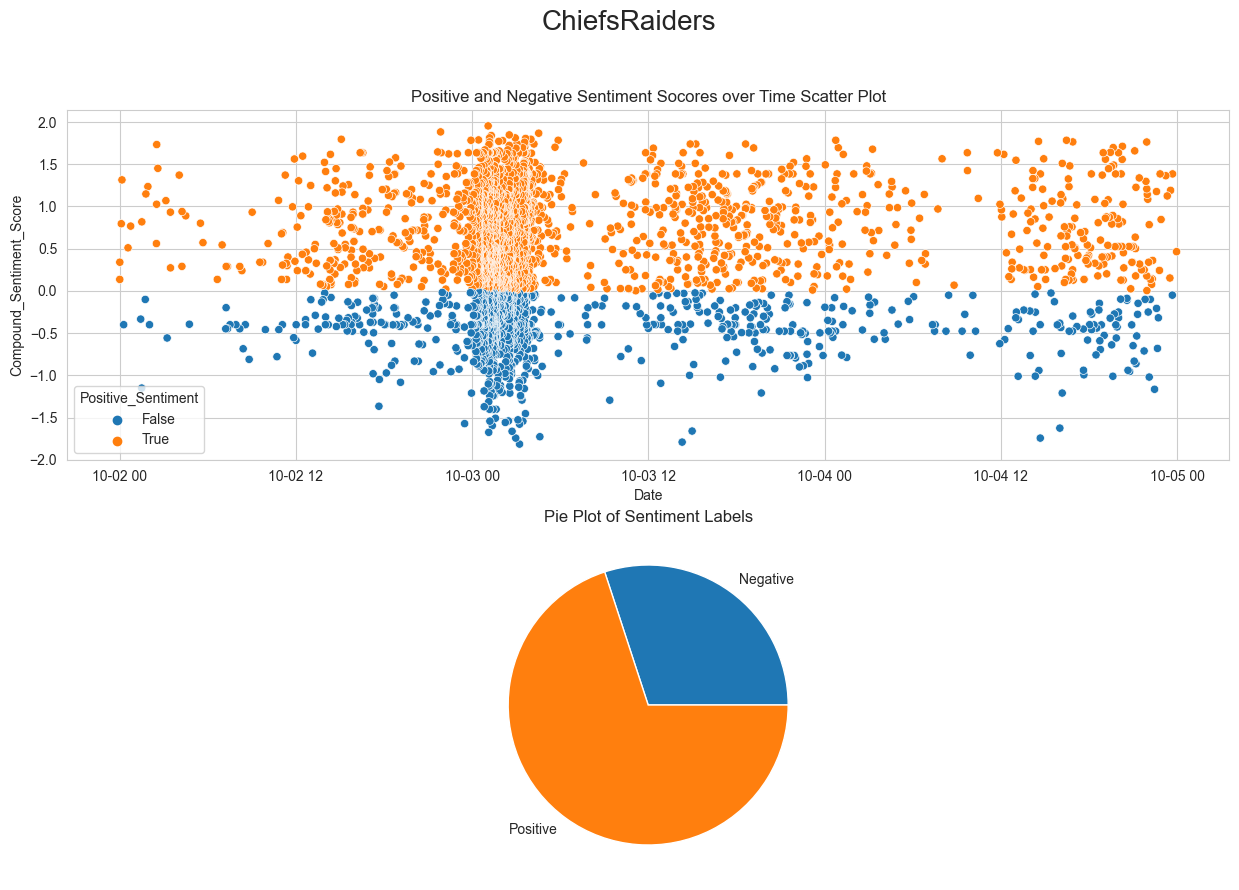

In [14]:
make_scatter_and_pie_figure(chiefs_dfs[5], 'ChiefsRaiders', save = True)

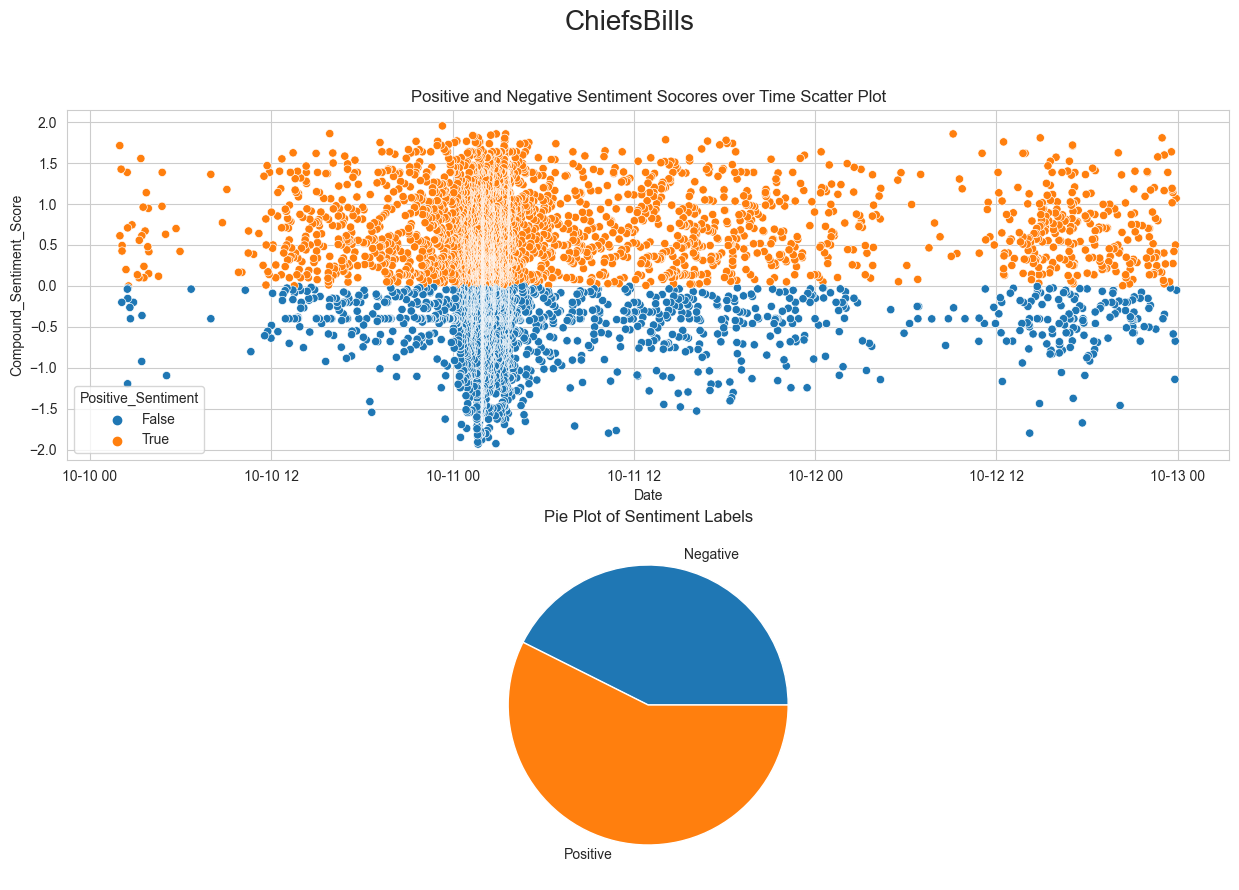

In [15]:
make_scatter_and_pie_figure(chiefs_dfs[6], 'ChiefsBills', save = True)

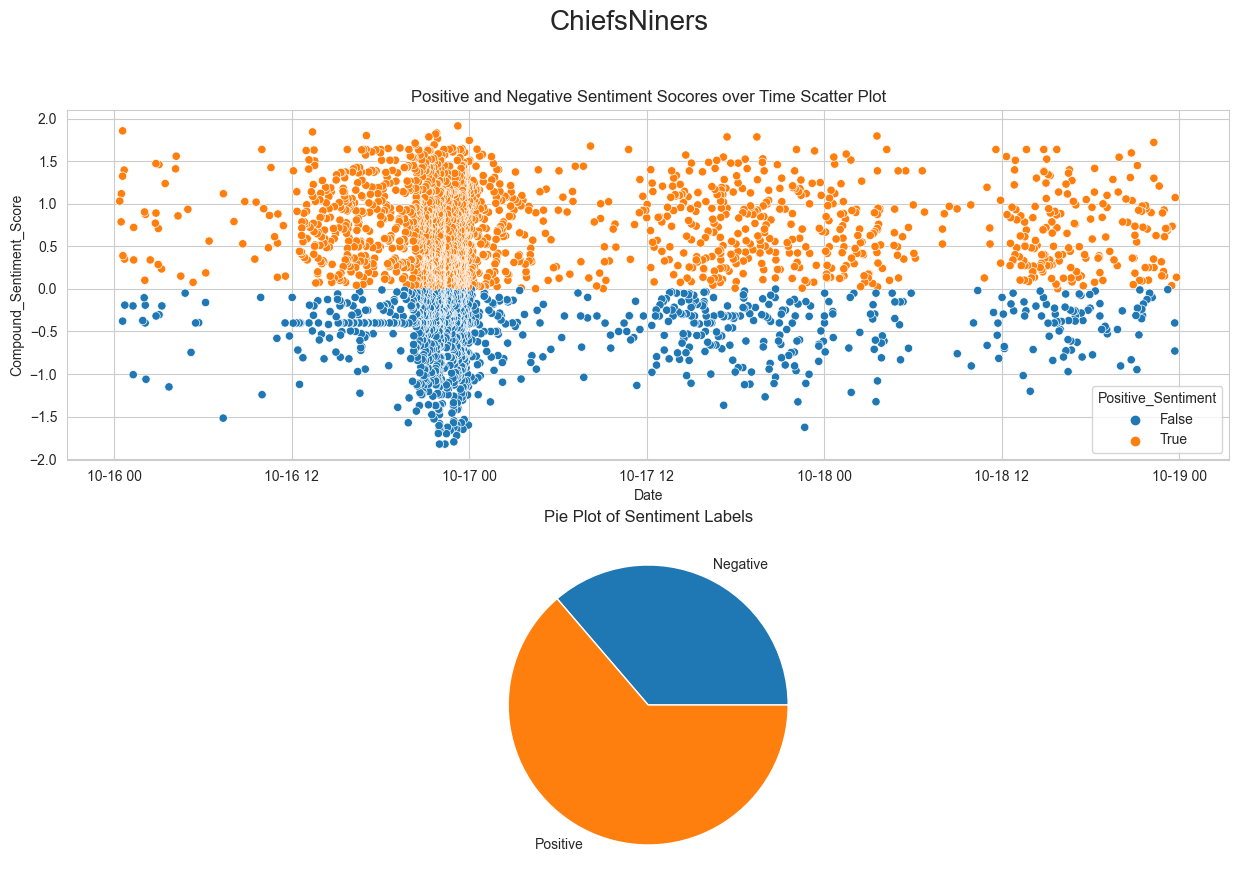

In [16]:
make_scatter_and_pie_figure(chiefs_dfs[7], 'ChiefsNiners', save = True)

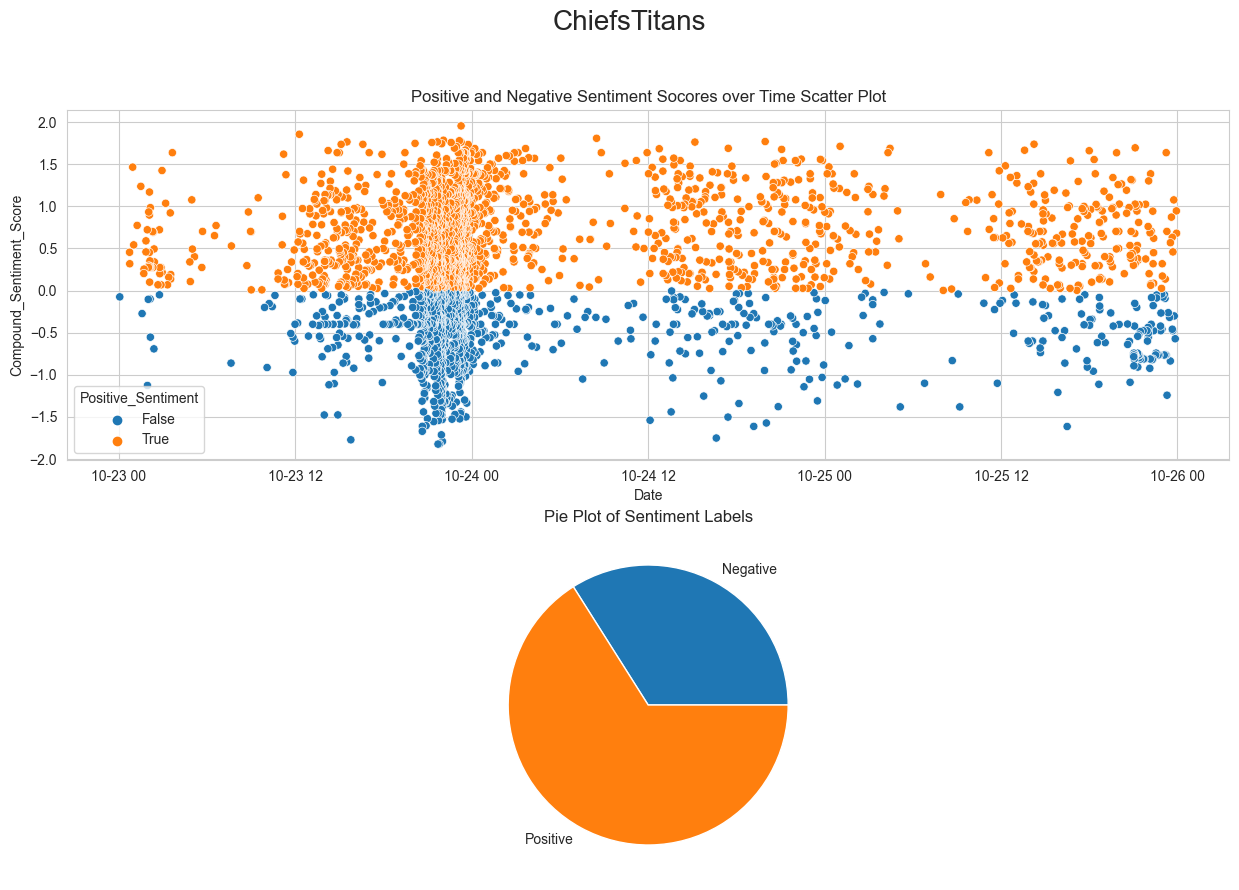

In [17]:
make_scatter_and_pie_figure(chiefs_dfs[8], 'ChiefsTitans', save = True)

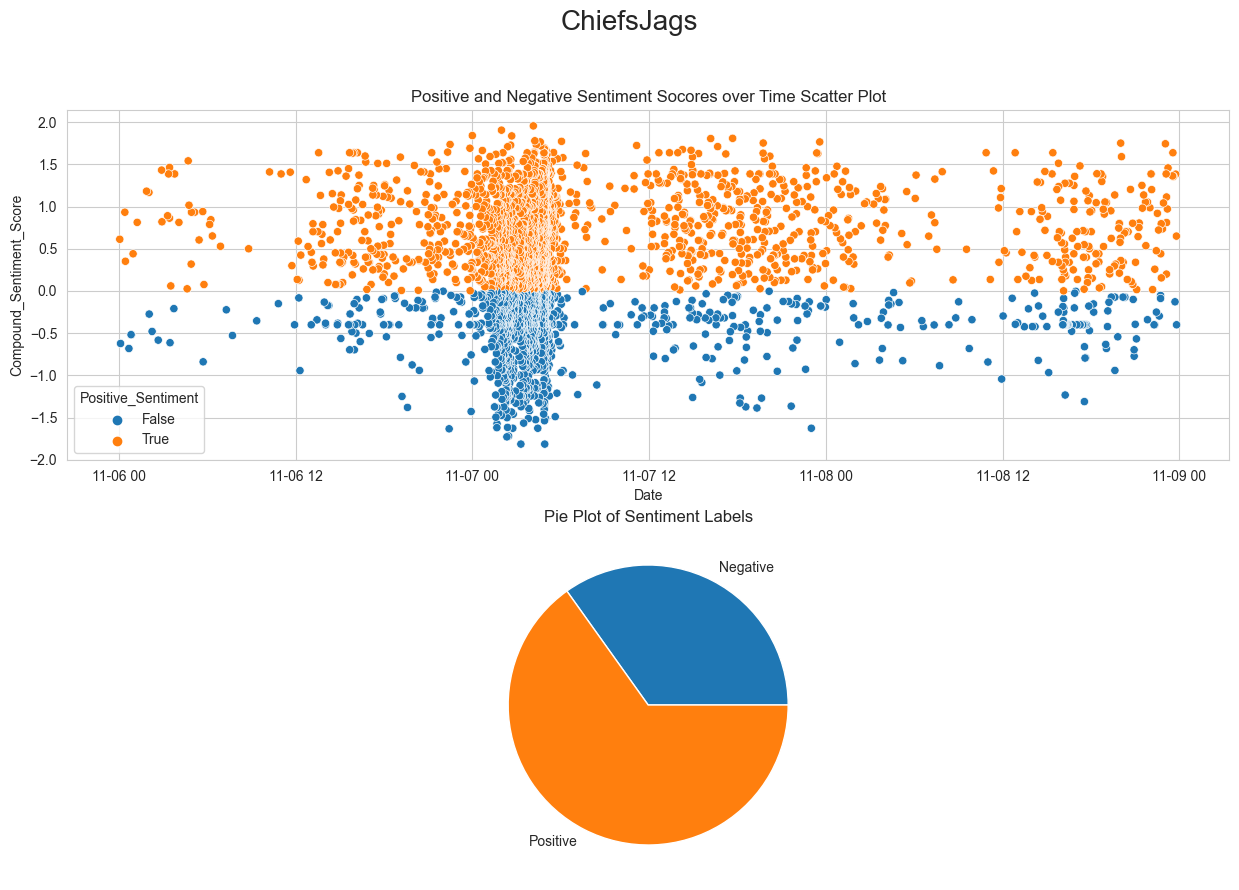

In [18]:
make_scatter_and_pie_figure(chiefs_dfs[9], 'ChiefsJags', save = True)

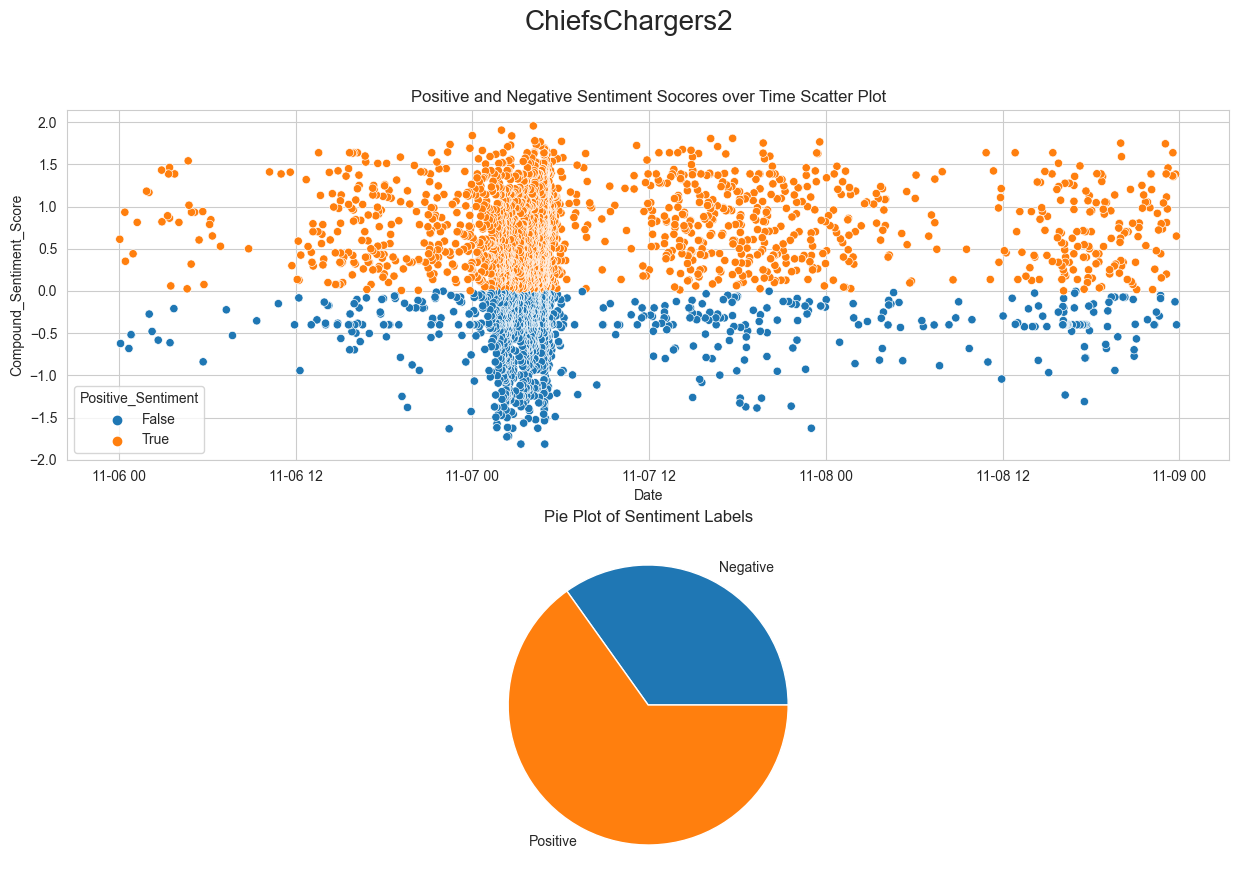

In [19]:
make_scatter_and_pie_figure(chiefs_dfs[9], 'ChiefsChargers2', save = True)

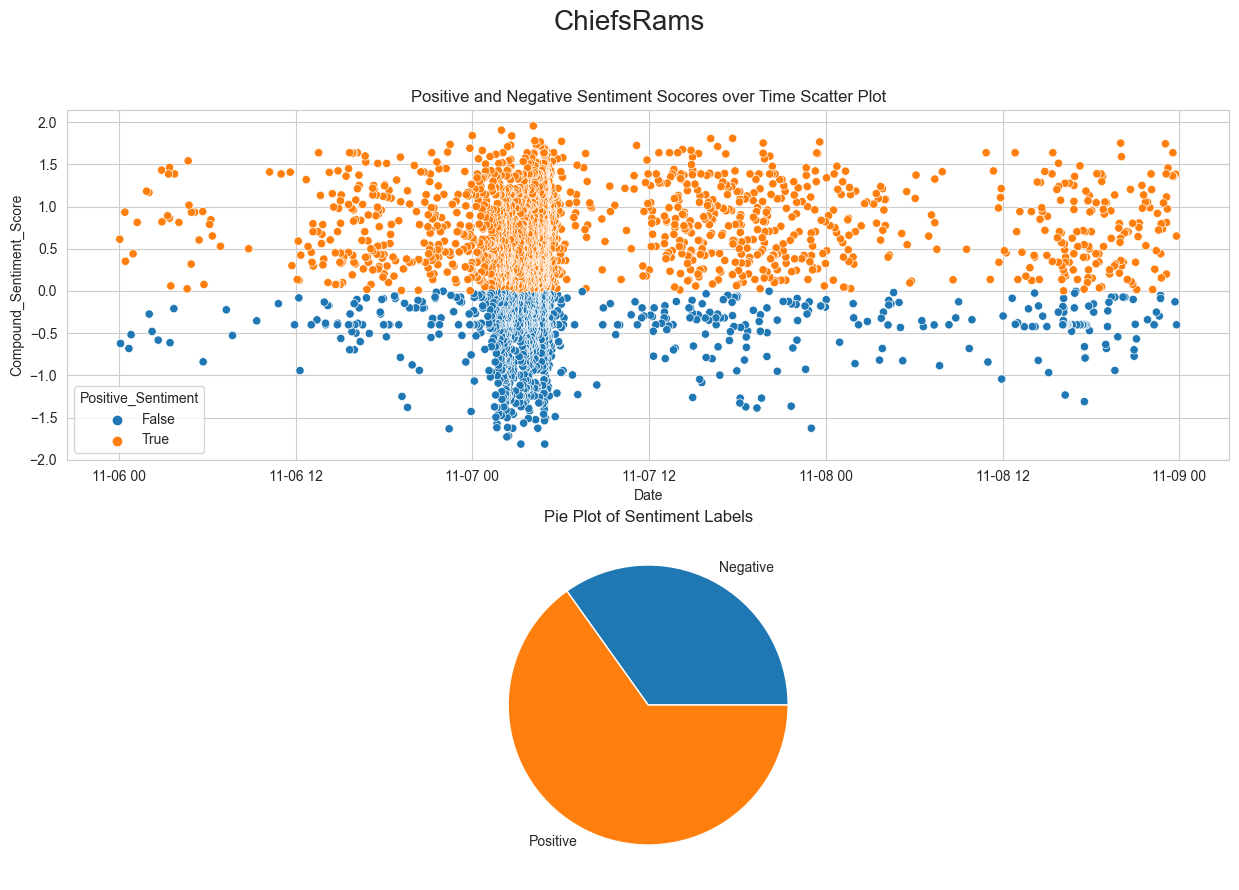

In [20]:
make_scatter_and_pie_figure(chiefs_dfs[9], 'ChiefsRams', save = True)

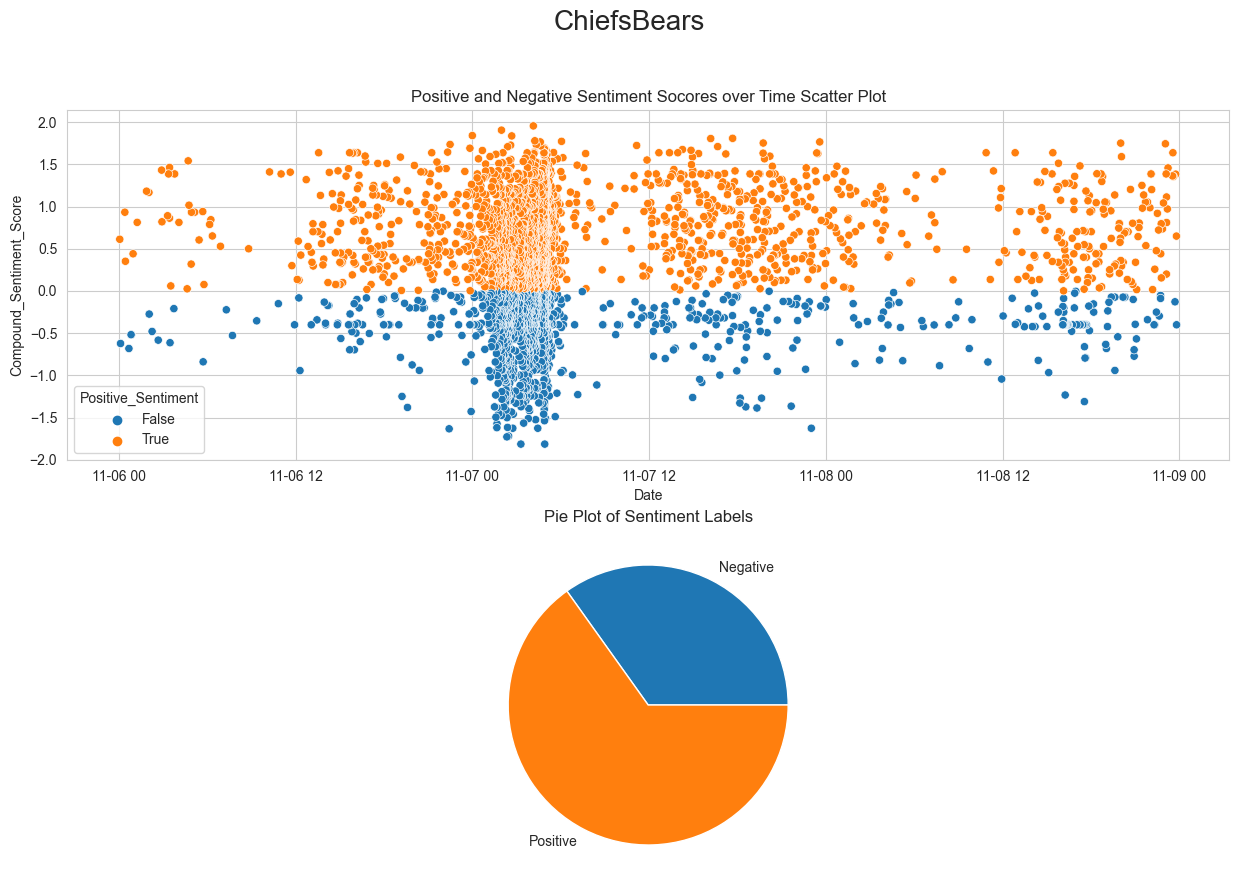

In [21]:
make_scatter_and_pie_figure(chiefs_dfs[9], 'ChiefsBears', save = True)

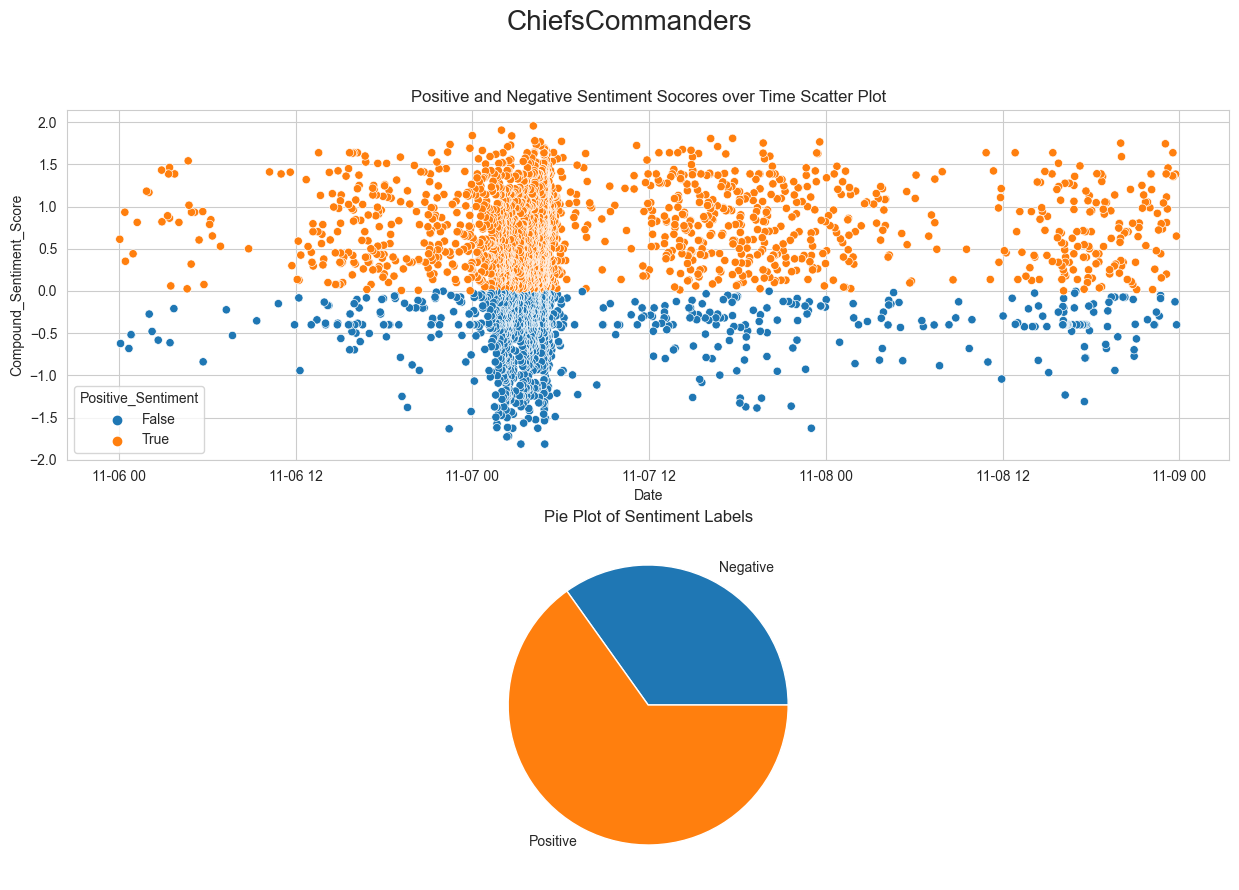

In [22]:
make_scatter_and_pie_figure(chiefs_dfs[9], 'ChiefsCommanders', save = True)

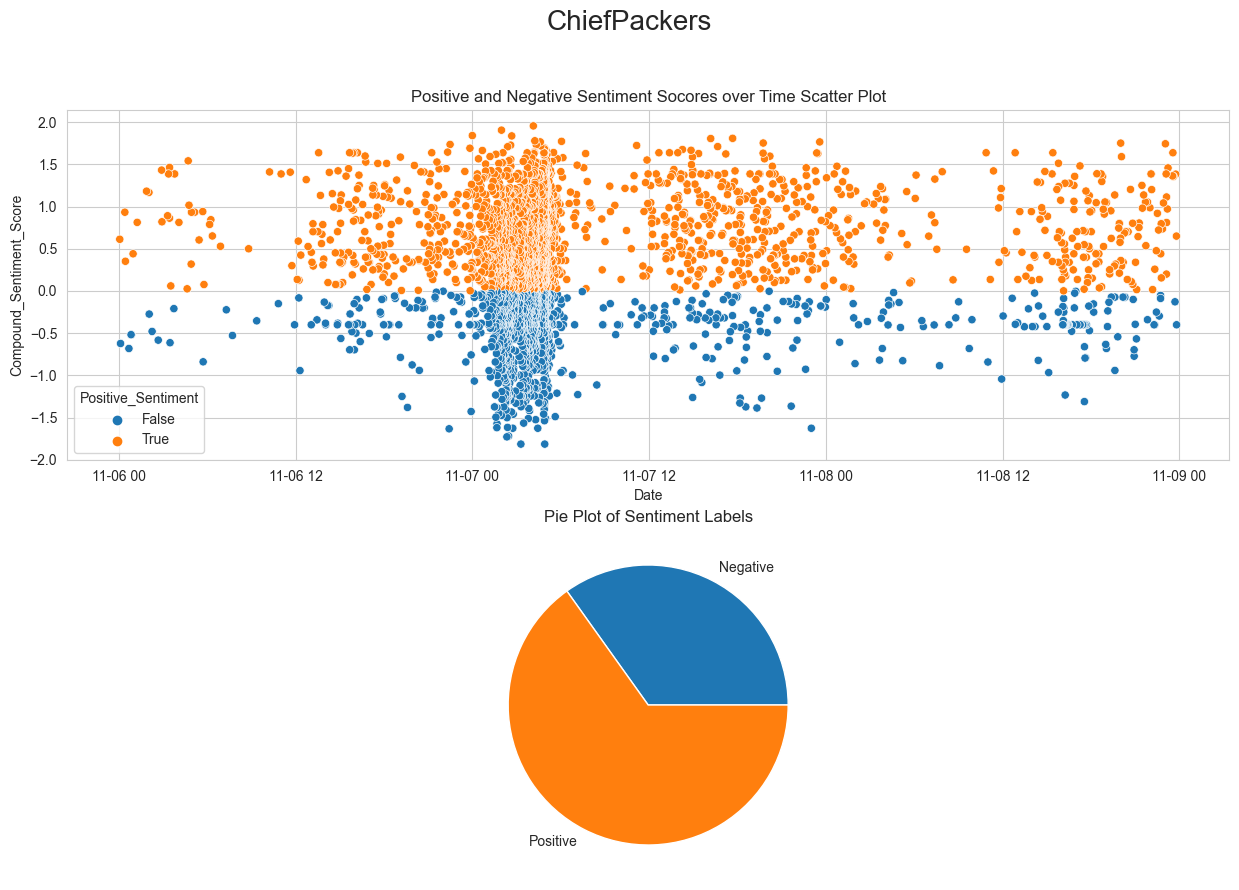

In [23]:
make_scatter_and_pie_figure(chiefs_dfs[9], 'ChiefPackers', save = True)

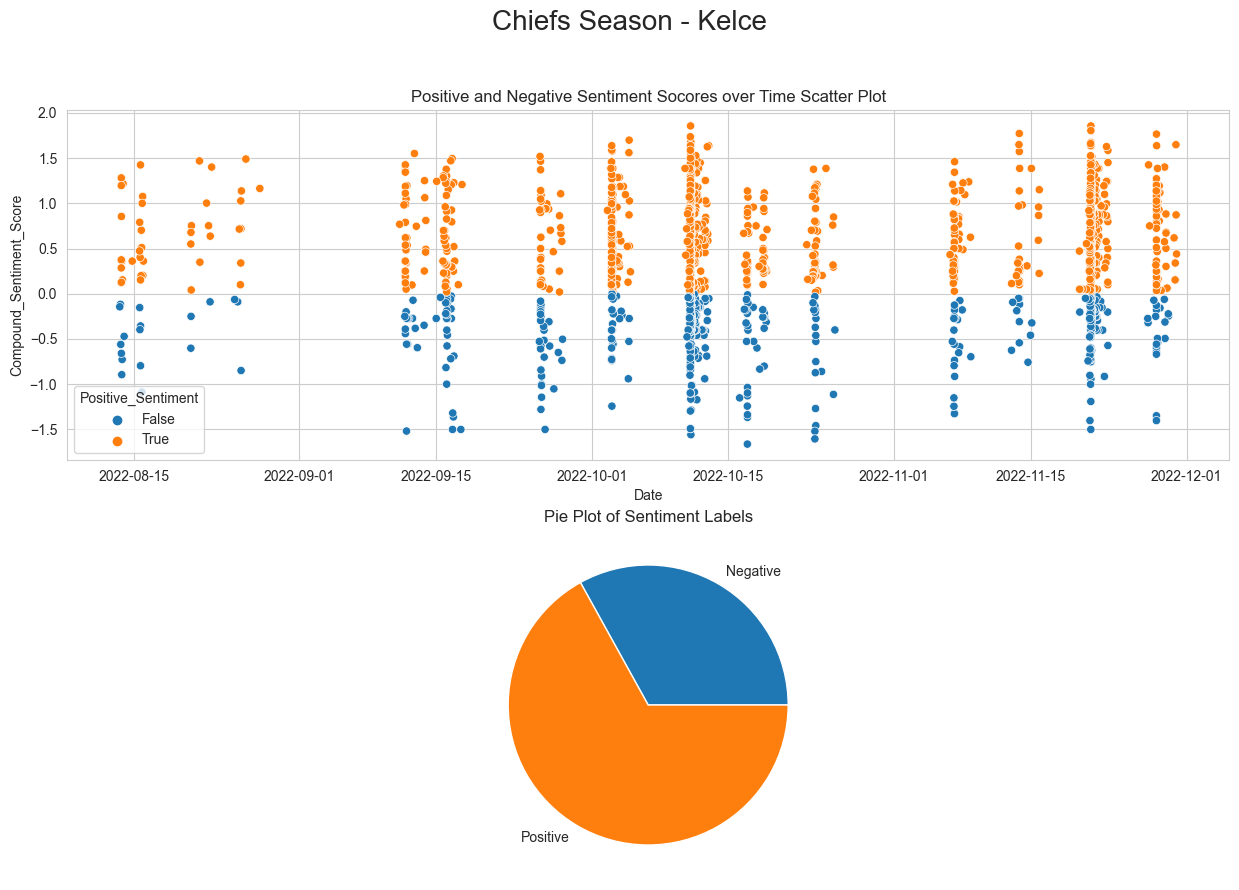

In [24]:

kelce_df3 = mega_Chiefs_df.loc[mega_Chiefs_df['clean_Tweet'].str.contains('kelce')]
make_scatter_and_pie_figure(kelce_df3, 'Chiefs Season - Kelce')